In [55]:
from scipy import stats

In [56]:
import pandas as pd 
import pandas_datareader as web

In [57]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2019-01-28')

In [58]:
aapl = web.DataReader('AAPL', 'yahoo', start, end)
spy_etf = web.DataReader('SPY', 'yahoo', start, end)

In [59]:
import matplotlib.pyplot as plt 
%matplotlib inline

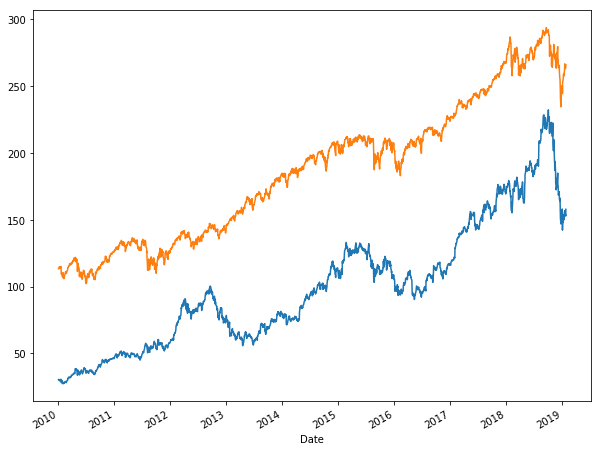

In [60]:
aapl['Close'].plot(label = 'AAPL', figsize = (10,8))
spy_etf['Close'].plot(label = 'SPY index')

In [61]:
aapl['Cummulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cummulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]


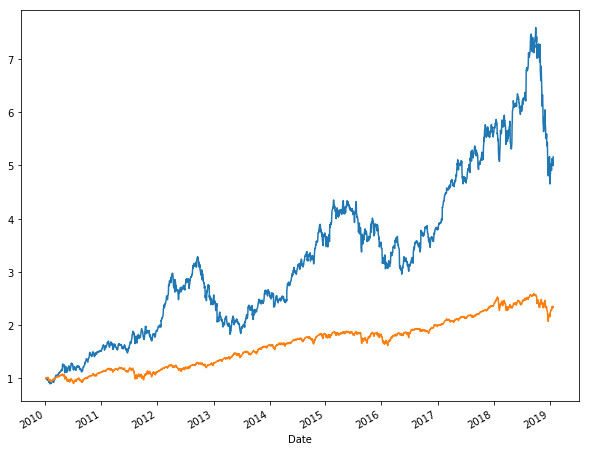

In [62]:
aapl['Cummulative'].plot(label ='AAPL', figsize=(10,8))
spy_etf['Cummulative'].plot(label ='SPY')

In [63]:
aapl['Daily Return']= aapl['Close'].pct_change(1)
spy_etf['Daily Return']= spy_etf['Close'].pct_change(1)

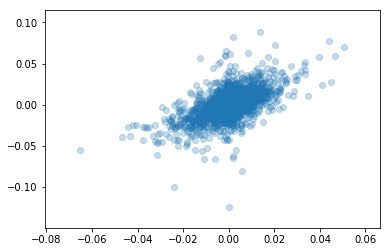

In [64]:
plt.scatter(spy_etf['Daily Return'], aapl['Daily Return'], alpha=0.25)

In [65]:
beta , alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:], spy_etf['Daily Return'].iloc[1:])

In [66]:
beta

0.33856823418230125

In [67]:
alpha

0.00012965427101883475

In [68]:
r_value

0.5851539085102053

In [70]:
##adding some noise to data
import numpy as np
noise = np.random.normal(0,0.001, len(spy_etf['Daily Return'].iloc[1:]))

In [72]:
fake_stock = spy_etf['Daily Return'].iloc[1:]+noise

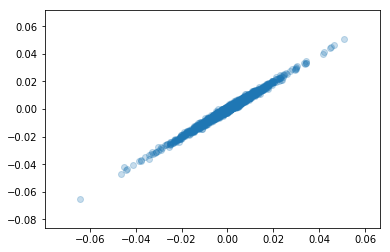

In [74]:
plt.scatter(fake_stock , spy_etf['Daily Return'].iloc[1:], alpha=0.25)

In [75]:
beta , alpha, r_value, p_value, std_err = stats.linregress(fake_stock, spy_etf['Daily Return'].iloc[1:])

In [76]:
beta

0.9878385197653502

In [77]:
alpha

-2.3459939202633018e-05